# Regresyon Nedir?

Regresyon, <span style='color:red'>bağımlı değişken (hedef-sonuç)</span> ile bir veya daha fazla <span style='color:red'>bağımsız değişken (özellik-girdi) </span> arasındaki ilişkiyi modelleyen istatistiksel bir yöntemdir. Temel amacı, verilen girdi değerlerine dayanarak sürekli bir çıktı değeri tahmin etmektir.

# Temel Regresyon Algoritmaları

## 1. Lineer (Doğrusal) Regresyon - (Linear Regression)

**Lineer regresyon,** istatistikte ve makine öğrenmesinde kullanılan en temel ve yaygın regresyon (doğrusal ilişki tahmini) yöntemidir. Amaç, bir bağımlı değişken (sonuç) ile bir veya daha fazla bağımsız değişken (girdi) arasındaki ilişkiyi **doğrusal bir denklemle** modellemektir.

**Lineer regresyon,** bağımlı değikenin (Y), bağımsız değişkenin (X) ile doğrusal bir ilişki içinde olduğunu varsayar. Bu ilişki şu şekilde ifade edilir:

$$ Y = a + bX + \epsilon $$

* $Y$ : Tahmin edilmek istenen değer (bağımlı değişken)
* $X$ : Girdi (bağımsız değişken)
* $a$ : Sabit terim (Y-intercept)
* $b$ : Eğim katsayısı (slope - X'in Y üzerindeki etkisi) (Regresyon Çizgi Eğrisi)
* $\epsilon$ : Hata payı (Bağımlı değişkenin belli bir hata içerdiği varsayılır. Bağımsız değişkende hata yoktur.)


Peki bu $a$ ve $b$ değerleri nasıl hesaplanır?

$$ a = \frac{\sum y \sum x^2 - \sum x \sum xy} {n(\sum x^2) - (\sum x)^2} $$
<br></br>
$$ b = \frac {n\sum xy - (\sum x) (\sum y)} {n \sum x^2 - (\sum x)^2}$$

**Ne İşe Yarar?**

* Veriler arasındaki ilişkiyi analiz eder.
* Geleceğe dönük tahminler yapar.
* Özellikler arası bağıntıyı ölçer.

**Avantajları:**

* Kolay anlaşılır ve yorumlanabilir.
* Hesaplama açısından verimli.
* Hızlı uygulanabilir.

**Sınırlamaları:**
* Sadece doğrusal ilişkileri modelleyebilir.
* Aykırı değerlerden etkilenebilir.
* Değişkenler arasında çoklu bağlantılar (multicollinearity) varsa sonuçlar bozulabilir.

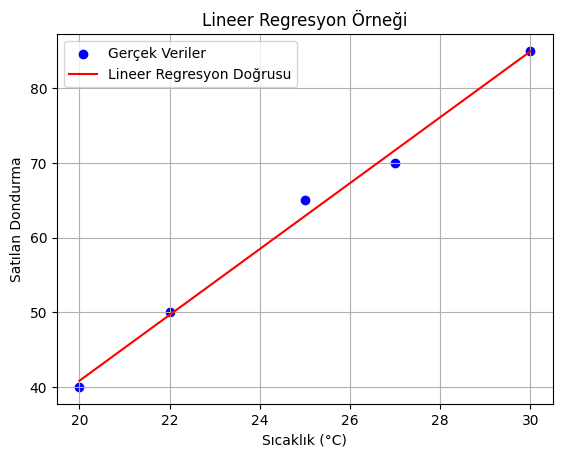

In [1]:
# Örnek

# Bir dondurmacı, günlük sıcaklık ile satılan dondurma sayısı arasında bir ilişki olup olmadığını görmek istiyor ve elimizde şöyle veriler alalım.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Verilerimiz
X = np.array([[20], [22], [25], [27], [30]]) # Sıcaklık
y = np.array([40, 50, 65, 70, 85]) # Satış

# Model oluşturma
model_LinearReg = LinearRegression()
model_LinearReg.fit(X, y)

# Tahmin (regresyon doğrusu)
X_line = np.linspace(20, 30, 100).reshape(-1,1) # 20'den 30'a kadar eşit aralıklı sayılardan oluşan bir dizi üret ve bu diziyi (100,1) boyutuna çevir.
y_pred = model_LinearReg.predict(X_line)

# Görselleştirme
plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.plot(X_line, y_pred, color="red", label="Lineer Regresyon Doğrusu")
plt.xlabel("Sıcaklık (°C)") # alt + 0176 --> derece işareti
plt.ylabel("Satılan Dondurma")
plt.title("Lineer Regresyon Örneği")
plt.legend()
plt.grid(True)
plt.show()

**Bu Grafik Bize Ne Anlatıyor?**
* Mavi noktalar: Gerçek veriler (ölçülen sıcaklık ve satışlar)
* Kırmızı çizgi: Lineer regresyonun oluşturduğu tahmin doğrusu
* Bu doğrudan "Sıcaklık arttıkça dondurma satışıda artıyor" (Pozitif bir doğrusal ilişki var.) yorumu çıkartırız.

In [2]:
print("Eğim (b):", model_LinearReg.coef_[0])
print("Sabit (a)", model_LinearReg.intercept_)

Eğim (b): 4.4108280254777075
Sabit (a) -47.388535031847155


Yukarıdaki işlemleri denklemin kendisine koyacak olursak..

$$ 
Y = a + bX + \epsilon
$$ 

$$
Satis = -47 + 4.4 * Sıcaklık
$$

* Her 1°C derecelik artışı, dondurma satışlarının ortalama 4.41 adet artırıyor.
* Sıcaklık 0°C olduğunda model, yaklaşık -47 adet olacağını tahmin ediyor ama fiziksel olarak negatif satış mümkün değildir. Bu, modelin doğrusal çizgiyi veri dağılımına en iyi uydurmak için seçtiği teorik başlangıç noktasıdır.
* Sabit terimin (intercept) değerinin büyük ve negatif olması,
  * Veri sıcaklık aralığı yeterince geniş değil, ya da
  * Satışlar düşük sıcaklıklarda hızlı artmaya başlıyor, bu yüzden model geriye doğru uzandığında negatif değerlere ulaşıyor.

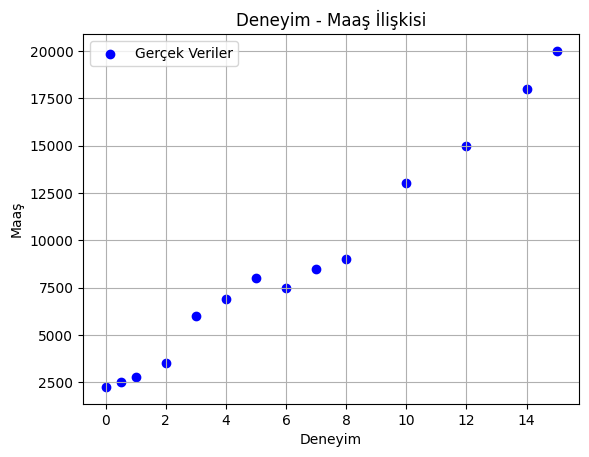

In [3]:
# Örnek

# Deneyim - Maaş bilgisine dayalı bir lineer regresyon yapalım

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Verilerimiz
X = np.array([[0.5], [0], [1], [5], [8], [4], [15], [7], [3], [2], [12], [10], [14], [6]]) # Deneyim
y = np.array([2500, 2250, 2750, 8000, 9000, 6900, 20000, 8500, 6000, 3500, 15000, 13000, 18000, 7500]) # Maaş

plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.xlabel("Deneyim") 
plt.ylabel("Maaş")
plt.title("Deneyim - Maaş İlişkisi")
plt.legend()
plt.grid(True)
plt.show()

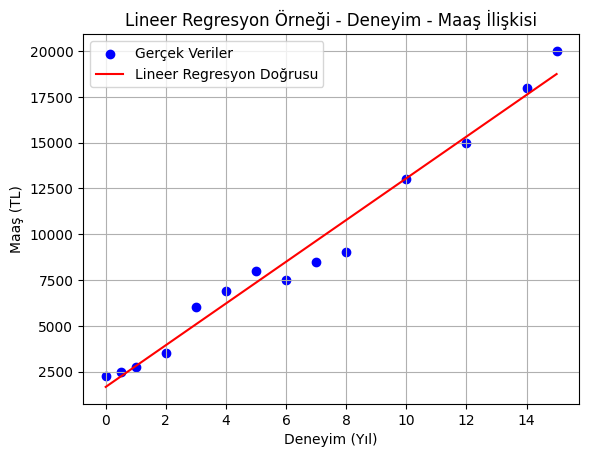

Sabit (a): 1663.8951974741067
Eğim (Slpoe) (b): [1138.34819698]


In [4]:
# Model oluşturma
model_LinearReg = LinearRegression()
model_LinearReg.fit(X, y)

# Tahmin (regresyon doğrusu)
X_line = np.arange(start=0, stop=16).reshape(-1,1)
y_pred = model_LinearReg.predict(X_line)

# Görselleştirme
plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.plot(X_line, y_pred, color="red", label="Lineer Regresyon Doğrusu")
plt.xlabel("Deneyim (Yıl)") 
plt.ylabel("Maaş (TL)")
plt.title("Lineer Regresyon Örneği - Deneyim - Maaş İlişkisi")
plt.legend()
plt.grid(True)
plt.show()

print("Sabit (a):", model_LinearReg.intercept_)
print("Eğim (Slpoe) (b):", model_LinearReg.coef_)

Yukarıdaki grafiği yorumlamak istersek;

* 0 deneyimi olan birisinin maaşı 1663 TL olduğunu,
* Her bir yıllık deneyimin, maaşa etkisi 1138 TL olduğu görüyoruz.
<br></br>

Lineer Regresyon Denkleminde her değişkeni yerine koyarsak;
$$ maas = 1663 + 1138* deneyim$$

$deneyim = 5$ yıl olan birisinin maaşı $ ---> maas = 1663 + 1138*5 = 7353$ TL olacaktır. 

In [5]:
# kod yazarak nasıl yaparız?

deneyim = 5

sonuc = model_LinearReg.predict(np.array([deneyim]).reshape(-1,1))
print(f"{deneyim} yıllık deneyime sahip birinin maaşı: {sonuc[0]}")


5 yıllık deneyime sahip birinin maaşı: 7355.6361823519655


## 2. Çoklu Lineer Regresyon (Multiple Linear Regression)

Bu modelde birden fazla bağımsız değişken (feature) vardır ama model doğrusal kalır.

Denklem:

$$
Y = a + b_1X_1 + b_2X_2 + ... + b_nX_n + \epsilon
$$

Örnek:

Bir arabanın tahmin etmek istiyoruz. Bağımsız değişkenler:
* Motor hacmi
* Yaş
* Kilometre
* Marka

Model:

$$
Fiyat = a + b_1(Motor) + b_2(Yas) + b_3(Km) + b_4(Marka) + ...
$$

Yukarıdaki denkeleme baktığımızda birden fazla değişken var, ama hepsi doğrusal olarak modele eklendiğini görüyoruz.

<br></br>
Örnek:

Deneyim, Yaş - Maaş bilgisine dayalı bir çoklu lineer regresyon (multiple linear regression) örneği yapalım.

Bağımlı ve bağımsız değişken/değişkenlere karar verelim.
* Bağımsız değişken: deneyim, yaş;
* Bağımlı değişken : maaş

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [7]:
# Verilerimiz
deneyim = np.array([0.5, 0, 1, 5, 8, 4, 15, 7, 3, 2, 12, 10, 14, 6]) # Deneyim
maas = np.array([2500, 2250, 2750, 8000, 9000, 6900, 20000, 8500, 6000, 3500, 15000, 13000, 18000, 7500]) # Maaş
yas = np.array([22, 21, 23, 25, 28, 23, 35, 29, 22, 23, 32, 30, 34, 27]) # yaş

df = pd.DataFrame({"Deneyim": deneyim, "Maas": maas, "Yas":yas})
df.head()



,Deneyim,Maas,Yas
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [8]:
# df.loc[:,["Deneyim", "Yas"]].values # böyle alırız ya da
# df.iloc[:, [0,2]].values # bu şekilde de alırız. 

# istediğim verileri nasıl çekeceğimi anladıysam, bağımlı - bağımsız değişkenleri almak vakti.

X = df.iloc[:, [0,2]].values # Bağımsız değişken
y = df["Maas"].values.reshape(-1,1)  # Bağımlı değişken


# Çoklu Lineer Regresyon Modeli 
multi_lin_reg = LinearRegression()
multi_lin_reg.fit(X, y)

LinearRegression()

In [9]:
# Test1
test_veri1 = np.array([[10,35]]) # deneyim = 10, yaş = 35
test_sonuc1 = multi_lin_reg.predict(test_veri1)
print(f" {test_veri1[0][0]} yıllık deneyim ve {test_veri1[0][1]} yaş sonucu çıkan maaş: {test_sonuc1[0]} TL")

 10 yıllık deneyim ve 35 yaş sonucu çıkan maaş: [11046.35815877] TL


In [10]:
# Test2 
test_veri2 = np.array([[5,35]]) # deneyim = 5, yaş = 35
test_sonuc2 = multi_lin_reg.predict(test_veri2)
print(f" {test_veri2[0][0]} yıllık deneyim ve {test_veri2[0][1]} yaş sonucu çıkan maaş: {test_sonuc2[0]} TL")

 5 yıllık deneyim ve 35 yaş sonucu çıkan maaş: [3418.85455609] TL


## 3. Polinom Regresyon (Polynomial Regression)

Bu modelde tek bir değişken bile olsa, bu değişkenin **üsleri (kuvvetleri)** modele katılır. Yani model doğrusal değil, eğrisel **(non-linear)** olur.

Denklem:

$$
Y = a + b_1X + b_2X^2 + b_3X^3 + ... + b_nX^n + \epsilon
$$

$n$ : Polinomun derecesi.

* Eğer doğrusal olmayan bir veri setine doğrusal regresyon uygularsak, iyi bir sonuç elde edemeyiz. Bu nedenle doğrusal olmayan veri seti üzerine polinomsal regresyon uygulamak daha iyi sonuç verecektir.

![non-linear](non-linear.jpg)

<br></br>
Dezavantajları:

* Polinomun derecesi arttıkça aşırı öğrenme (Overfitting) çok yatkın hale gelir. Model, eğitim verisini ezberler ama yeni verilerde başarısız olur.

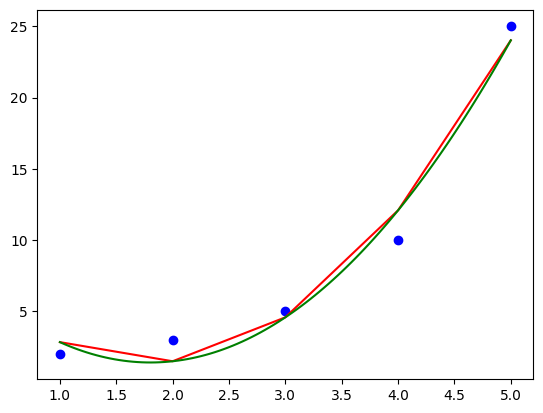

In [11]:
# Rastgele bir örnek yapalım.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Örnek veri oluşturalım.

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 3, 5, 10, 25])

# Polinom Özelliğini Oluşturma (derece=2)
poly = PolynomialFeatures(degree=2)
X_Poly = poly.fit_transform(X)

# Model (Liner Regresyon) Uygulama
model = LinearRegression()
model.fit(X_Poly, y)

# Tahmin 
X_new = np.linspace(1, 5, 100).reshape(-1, 1)
X_new_poly = poly.transform(X_new)
y_pred = model.predict(X_new_poly)
y_pred1 = model.predict(X_Poly) # Kırmızı çizgi 

plt.scatter(X, y, color="blue")
plt.plot(X, y_pred1, color="red")
plt.plot(X_new, y_pred, color="green")
plt.show()

Örnek:

Araba fiyatları ve hızlarını içeren bir örnek yapalım

In [50]:
arr = np.array([
    [60, 180],
    [70, 180],
    [80, 200],
    [100, 200],
    [120, 200],
    [150, 220],
    [200, 240],
    [250, 240],
    [300, 300],
    [400, 350],
    [500, 350],
    [750, 360],
    [1000, 365],
    [2000, 365],
    [3000, 365]
])

df = pd.DataFrame(arr, columns=["price", "speed"])
df.head(2)

,price,speed
0,60,180
1,70,180


In [51]:
X = df["price"].values.reshape(-1, 1)
y = df["speed"].values.reshape(-1, 1)

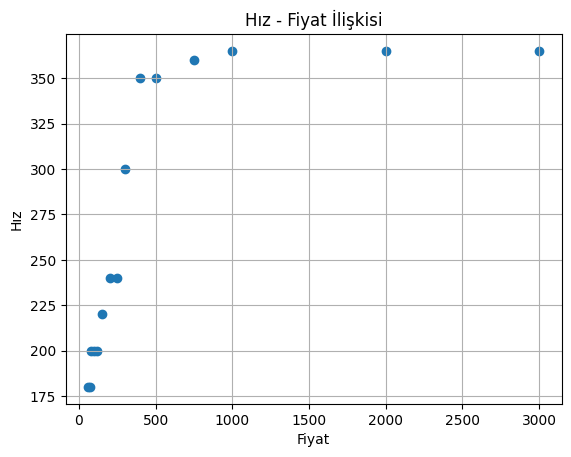

In [52]:
# veriyi görselleştirelim.
plt.scatter(X, y)
plt.ylabel("Hız")
plt.xlabel("Fiyat")
plt.title("Hız - Fiyat İlişkisi")
plt.grid()
plt.show()

* Hem lineer regresyon hem de polinom regresyon yapalım.

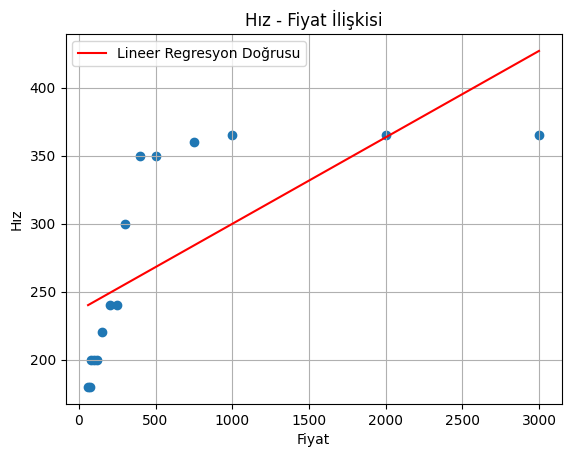

Araba fiyatı 5000 ise hızı: [[553.9799921]]


In [53]:
# Doğrusal Regresyon
model_LinearReg = LinearRegression()
model_LinearReg.fit(X, y)

y_pred = model_LinearReg.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red", label ="Lineer Regresyon Doğrusu")
plt.ylabel("Hız")
plt.xlabel("Fiyat")
plt.title("Hız - Fiyat İlişkisi")
plt.grid(True)
plt.legend()
plt.show()

fiyat = 5000
print(f"Araba fiyatı {fiyat} ise hızı: {model_LinearReg.predict(np.array([fiyat]).reshape(1, -1))}")

* Araba değeri 5000 olunca hızı da 553 Km/h oluyor. Lineer Regresyon modeli kullandığımızda modelin düzgün cevap vermediğini görüyoruz.
* Şimdi ise Polinom Regresyonu uygulayalım.

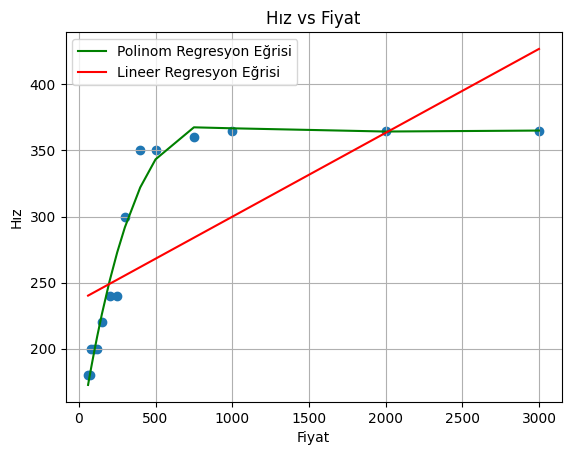

In [55]:
# Polinom Özellikler (Polynomial Features) ekleyeceğiz.
poly_LinearReg = PolynomialFeatures(degree=4) # 2.dereceden polinom olarak ayarladık. En uygun olan 4 ama 2,3,4 şeklinde görerek ilerleyelim.

X_poly = poly_LinearReg.fit_transform(X)
X_poly

# Polinomsal Regresyon eğitme
model_PolyReg = LinearRegression()
model_PolyReg.fit(X_poly, y)

# tahmin ve görselleştirme
y_predPoly = model_PolyReg.predict(X_poly)

plt.scatter(X, y)
plt.plot(X, y_predPoly, color="green", label="Polinom Regresyon Eğrisi")
plt.plot(X, y_pred, color="red", label="Lineer Regresyon Eğrisi")
plt.ylabel("Hız")
plt.xlabel("Fiyat")
plt.title("Hız vs Fiyat")
plt.legend()
plt.grid(True)
plt.show()

## 4. Ridge Regresyon (Ridge Regression)

Doğrusal regresyonun **aşırı öğrenme** problemini çözmek için kullanılan bir düzenleştirme (regularization) tekniğidir. Özellikle çok sayıda özelliği olduğu durumlarda etkilidir.

* Çalışma Mantığı: Standart doğrusal regresyonun maliyet fonksiyonuna, katsayıların karelerinin toplamını içeren bir ceza terimi (L2 Regularization) ekler. Bu ceza terimi, modelin katsayıları çok fazla büyütmesini engelleyerek daha stabil ve genellenebilir bir model oluşturur.

* Avantajları:
  * Aşırı öğrenmeyi azaltır.
  * Birbiriyle ilişkili (çoklu doğrusal bağlantı - multicollinearity) özelliklerin olduğu durumlarda performansı artırır.
<br></br>

* Dezavantajları:
  * Katsayıları sıfıra yaklaştırır ama tam olarak sıfır yapmaz. Bu nedenle otomatik özellik seçimi yapmaz.

Denklem:

Lineer Regresyonda kullandığımız model:
$$
y = a + bX
$$

Ridge, modelin **b (eğim)** değerlerinin çok büyük olmasını engeller. Bunu, **b'nin karesini** cezalandırarak yapar.

$$
Hata (Loss) = (y_{gercek} - y_{Tahmin})^2 + \lambda * b^2
$$
$$
Hata (Loss) = \sum(y_{gercek} - (a +bX))^2 + \lambda * \sum b^2
$$

https://online.stat.psu.edu/stat857/node/155/

$\lambda :$ Cezalandırma katsayısı (ne kadar büyükse, $b$ o kadar küçülür) (kullanıcı verir)

$b^2 :$ Eğimin karesi (büyük $b$ değerlerini cezalandırır)

* İlk kısım (normal hata): modelin tahmin hatası
* İkinci kısım $(\lambda b^2)$ : Ridge'in eklemiş olduğu ceza

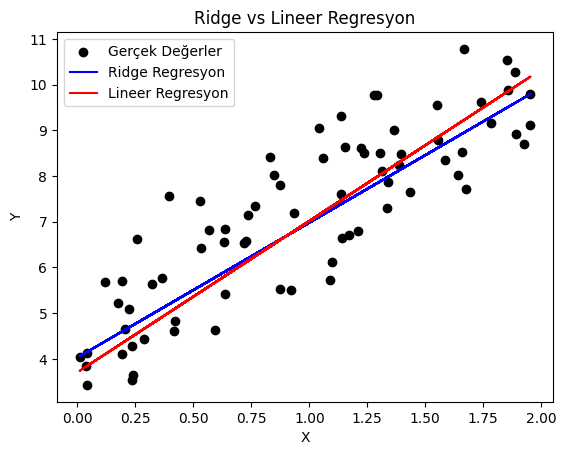

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split #veriyi ayırma işlemi için gerekli

# Basit veri üretelim
np.random.seed(0)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Train-test bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

# Ridge Regresyon Modeli
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X_train, y_train)

# Normal Lineer Regresyon Modeli
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Tahminler (Ridge, Lineer)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_linear = linear_model.predict(X_test)

# Sonuçları çizelim
plt.scatter(X_test, y_test, color="black", label="Gerçek Değerler")
plt.plot(X_test, y_pred_ridge, color="blue", label="Ridge Regresyon")
plt.plot(X_test, y_pred_linear, color="red", label="Lineer Regresyon")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Ridge vs Lineer Regresyon")
plt.show()

## 5. Lasso Regresyon (Lasso Regression)

Lasso (En Küçük Mutlak Daraltma ve Seçim Operatörü - Least Absolute Shrinkage and Selection Operator), lineer regresyonun **L1** düzenlileştirme (regularization) eklenmiş durumudur. Temel amaç, gereksiz özelliklerin (features) katsayılarını **tam olarak sıfıra çekerek** otomatik **özellik seçimi (feature selection)** yapmaktır.

Ridge regresyondan farkı, katsayıları küçültmek yerine bazılarını sıfırlayabilmesidir.

Özellikleri:
* Bazı katsayıları tam sıfır yapar.
* Otomatik özellik seçimi sağlar.
* Aşırı öğrenmeyi önler.

Denklem:

$$
    Hata(MSE_{Lasso}) = (y_{gercek} - (a+bX))^2 + \lambda |b|
$$
$$    
    Hata(MSE_{Lasso}) = \sum{(y_{gercek} - (a+bX))^2} + \lambda \sum{|b|}
$$

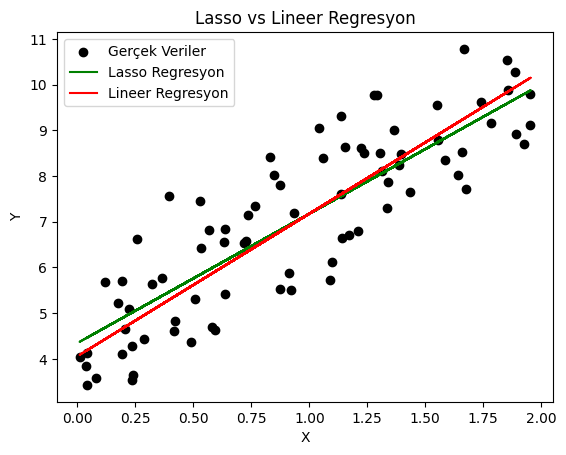

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split

# Veri üretimi
np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Train-Test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Lasso Regresyon Modeli
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Lineer Regresyon Modeli
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Tahminler 
y_pred_lasso = lasso_model.predict(X_test)
y_pred_linear = linear_model.predict(X_test)

# Grafik Çizim
plt.scatter(X_test, y_test, color="black", label="Gerçek Veriler")
plt.plot(X_test, y_pred_lasso, color="green", label="Lasso Regresyon")
plt.plot(X_test, y_pred_linear, color="red", label="Lineer Regresyon")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Lasso vs Lineer Regresyon")
plt.show()

## 6. Elastic Net Regresyon

**Elastic Net Regresyon,** Ridge (L2) ve Lasso (L1) regresyonlarının birleşiminden oluşan güçlü bir regresyon modelidir. Her ikisinin avantajlarını birleştirerek, hem aşırı uyumu önler hem de özellik seçimi (feature selection) yapabilir.

Denklem:

$$
Cost = \sum {(y_i - \hat{y}_i)^2} + \lambda_1 \sum \left| \beta_j \right| + \lambda_2 \sum \beta_j^2
$$

Yani:

$$
Cost = Hata + L1 \space cezası \space (Lasso) + L2 \space cezası \space (Ridge)
$$



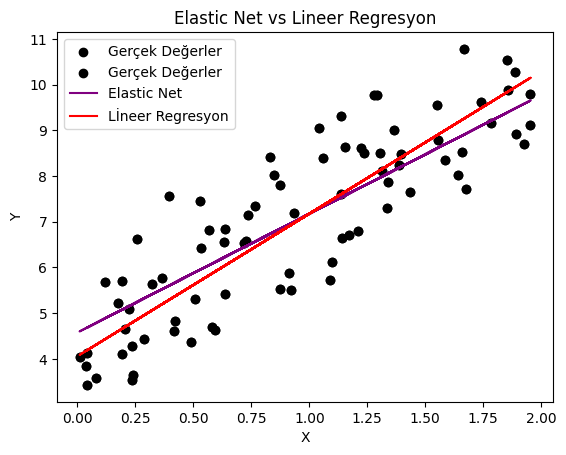

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split

# Veri Üretimi
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Train-Test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Elastic Net Modeli
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5) # %50 L1, %50 L2
elastic_model.fit(X_train, y_train)

# Lineer Regresyon
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Tahminler
y_pred_elastic = elastic_model.predict(X_test)
y_pred_linear = linear_model.predict(X_test)

# Grafik çizim
plt.scatter(X_test, y_test, color="black", label="Gerçek Değerler")
plt.plot(X_test, y_pred_elastic, color="purple", label="Elastic Net")
plt.plot(X_test, y_pred_linear, color="red", label="Lİneer Regresyon")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Elastic Net vs Lineer Regresyon")
plt.show()

| Durum                              | Ridge | Lasso | Elastic Net |
| ---------------------------------- | ----- | ----- | ----------- |
| Çoklu değişken korelasyonu varsa   | ❌     | ❌     | ✅           |
| Özellik seçimi yapmak istersen     | ❌     | ✅     | ✅           |
| Tüm katsayıları küçültmek istersen | ✅     | ✅     | ✅           |
| En iyi genellemeyi istersen        | 🔸    | 🔸    | ✅           |


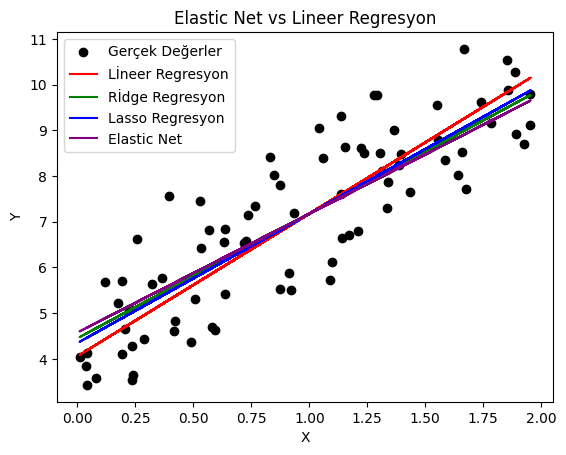

In [171]:
# Ridge, Lasso, Elastic Net ve Lineer Regresyon modellerini hepsini koyalım

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

# Veri Üretimi
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Train-Test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Elastic Net Modeli
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5) # %50 L1, %50 L2
elastic_model.fit(X_train, y_train)

# Lineer Regresyon
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Ridge Regresyon
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Lasso Regresyon
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Tahminler
y_pred_elastic = elastic_model.predict(X_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Grafik çizim
plt.scatter(X_test, y_test, color="black", label="Gerçek Değerler")
plt.plot(X_test, y_pred_linear, color="red", label="Lİneer Regresyon")
plt.plot(X_test, y_pred_ridge, color="green", label="Rİdge Regresyon")
plt.plot(X_test, y_pred_lasso, color="blue", label="Lasso Regresyon")
plt.plot(X_test, y_pred_elastic, color="purple", label="Elastic Net")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Elastic Net vs Lineer Regresyon")
plt.show()

## 7. Destek Vektör Regresyonu (Supoort Vektor Regression - SVR)

SVR, Support Vector Machhine (SVM) algoritmasının regresyon (sürekli değer tahmini) için uyarlanmış halidir.

Klasik regresyon modellerinden farklı olarak SVR, sadece veriye en iyi uyan doğruyu çizmekle kalmaz, aynı zamanda hata payı ($\epsilon$- insensitive zone) içinde kalan tahminleri cezalandırmaz.

Amaç: SVR, tahmin edilen değerlerin gerçek değerlere **belirli bir tolerans ($\epsilon$) dahilinde** yakın olmasını sağlar. Yani:
* Tahminler $y_i$ ile gerçekteki değeler $\hat y_i$ arasındaki fark $\epsilon$'dan küçükse --> cezalandırmaz.
* Fark $\epsilon$'dan büyükse --> model ceza uygular

Denklem:

$$
y = w^Tx +b 
$$

* Model, yukarıdaki denkle ile bir regresyon çizgisi çizmeye çalışır. 
* Amaç: bu çizgiden en fazla $\epsilon$ kadar uzaklıkta kalan tüm noktaları içeren bir "tüp-boru (tube)" oluşturmak
* Tüpün dışında kalan noktalar için ceza uygulanır.
* Destek vektörleri, bu tüpe değen veya dışına çıkan noktalar olur (modelin kararını etkileyenler).

Avantajları:
* Lineer olmayan verilerde kernel fonksiyonu sayesinde güçlü performans gösterebilir.
* Aykırı değerlere karşı daha dayanıklıdır (epsilon ile)

Dezavantajları:
* Büyük veri kümelerinde eğitim süresi uzayabilir.
* Parametre seçimi (C, epsilon, kernel) hassastır, dikkatle ayarlanmalı (Grid Search önerilir).

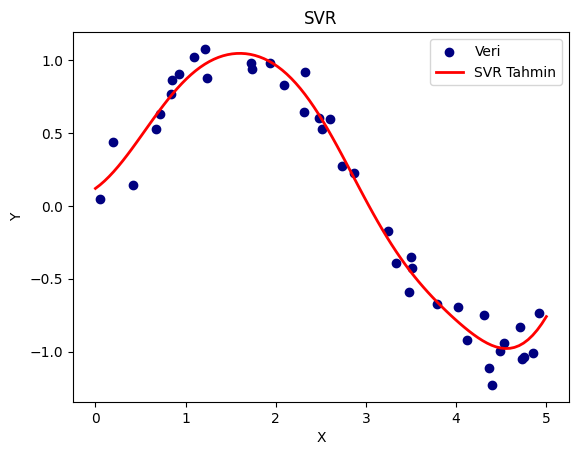

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Veri üretelim
np.random.seed(9)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0]) # Gürültü sinüs

# SVR Modeli
svr_rbf = SVR(kernel="rbf", C=100, epsilon=0.1)
# kernel --> Veriyi dönüştürmek için kullanılan fonksiyon
    # rbf : Doğrusal olmayan ilişkiler
    # linear : Doğrusal ilişkiler
    # poly : Polinomsal dönüşüm
    # sigmoid :
    # precomputed :
# C --> Hata ceza parametresi. 
    # Küçük C: Daha geniş marj, daha fazla hata tolere eder
    # Büyük C: Daha dar marj, hatalara sert ceza
# epsilon --> Marj genişliği
    # Küçük E: Daha hassas model (overfitting riski)
    # Büyük E: Daha toleranslı model
svr_rbf.fit(X,y)

# Tahmin
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = svr_rbf.predict(X_test)


# Grafik çizim
plt.scatter(X, y, color="navy", label="Veri")
plt.plot(X_test, y_pred, color="red", lw=2, label="SVR Tahmin")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("SVR")
plt.show()

# RBF Kernel çoğu durumda başlangıç için iyi bir tercih.

## 8. Karar Ağacı Regresyonu (Decision Tree Regression)

Karar ağacı; veriyi belirli kurallar göre dallara ayırarak sınıflandırma veya tahmin yapan bir algoritmadır. Regresyonda ise **sayısal bir değeri tahmin eder.**

Temel Çalışma Mantığı

1. Veriyi Dallara Ayırma:
   * Her düğümde (node), bir özellik (feature) ve bir eşik değeri (threshold) seçilir.
   * Mesela "Yaş <= 30" gibi bir koşulla veri iki alt gruba ayrılır.
2. Yaprak Düğümlerde (leaf) Tahmin:
   * Her yaprak düğümde, o bölgedeki verilerin **ortalama değeri** tahmin olarak kullanır.
   * Mesela "Yaş>30 ve Maaş<5000" grubundaki hedef değişkenin ortalaması 42.3

Genel Tahmin Fonksiyonu:

$$
\hat f(x) = \sum_{m=1} ^{M} c_m 1_{x\in R_m}
$$

* $M$ : Yaprak düğüm sayısı
* $R_m$ : m. yaprak düğümün kapsadığı bölge.
* $c_m$ : Bölge $R_m$ içindeki hedef değerlerin ortalaması,
* $1_{x\in R_m}$ : Girdi $x$'in $R_m$ bölgesine ait olup olmadığını belirten gösterim (1 ise dahil, 0 ise değil).

Avantajları:
* Doğrusal olmayan ilişkileri yakalar,
* Kategorik değişkenlerle çalışabilir,
* Yorumlanması kolay.

Dezavantajları:
* Overfitting eğilimi,
* Küçük veri değişikliklerine hassas.
  

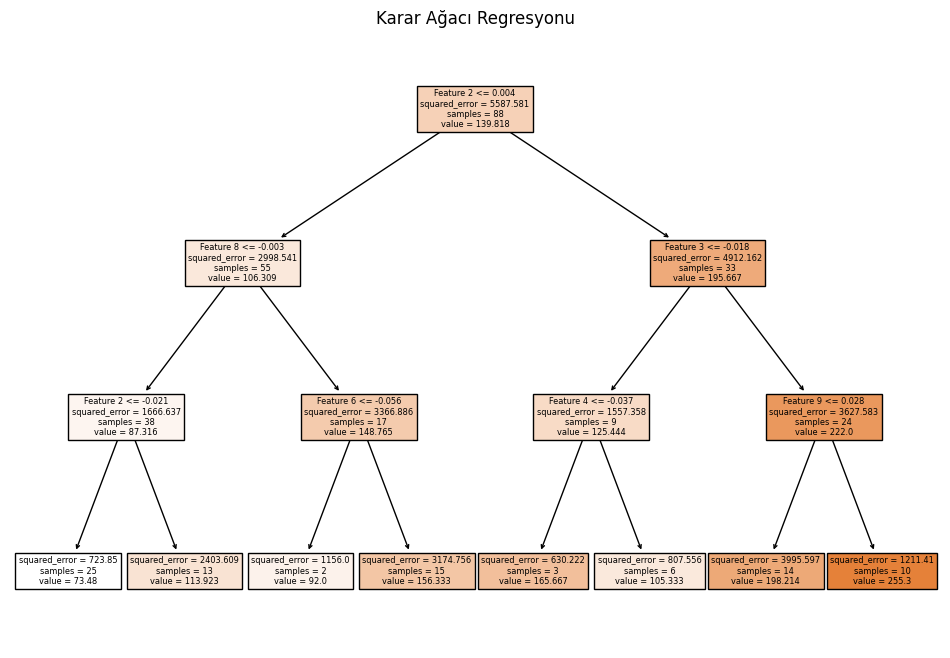

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Veri yükle
X, y = load_diabetes(return_X_y=True)
# return_X_y = True --> X girdi verileri (öznitelik/features), y hedef değerler (etiketler/labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Model oluştur ve eğit
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
# max_depth = 3 --> ağacın maksimum  derinliği belli ederiz
tree.fit(X_train, y_train)

# Tahmin
y_pred = tree.predict(X_test)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=[f"Feature {i}" for i in range(X.shape[1])])
# tree : Eğitimden geçmiş karar ağacı modelidir. (DTR ya da DTC)
# filled = True --> Görsel olarak hangi düğümlerin yüksek/düşük çıktılar verdiğini anlamayı kolaylaştırır.
# feature_names --> feature isimlerini belirtir. Biz de özellik isimleri olmadığı için 1,2,3,4, ... yazacak.
    # X.shape[1] --> veri setindeki sütun sayısı
plt.title("Karar Ağacı Regresyonu")
plt.show()

## 9. Rastgele Orman Regresyonu (Random Forest Regression)

Random Forest, birden fazla karar ağacının (decision tree) birleşiminden oluşan bir **ensemble learning (topluluk öğrenme)** yöntemidir. Regresyon problemlerinde, her ağacın tahminlerinin **ortalamasını** alınarak daha güçlü ve istikrarlı bir model oluşturulur. 

Temel mantık: "Çok sayıda zayıf modelin birleşimi, tek bir güçlü model yaratır."

Nasıl Çalışır?

1. Ağaçlar Oluşturma (Bootstrap Aggregating - Bagging):
   * Eğitim verisinden rastgele alt örneklemler (bootstrap samples) seçilir.
   * Her ağaç, bu alt örneklemler üzerinde eğitilir.
2. Rastgelelik Eklenmesi:
   * Her düğümde (node) sadece rastgele bir alt küme özellik (feature) kullanılır. (max_features parametresi)
   * Böylece ağaçlar birbirinden farklılaşır ve modelin varyansı azalır.
3. Tahmin Yapma:
   * Her ağaç bir tahmin üretir.
   * Regresyonda, bu tahminlerin **ortalamaası** alınır.


Denklem:

Random Forest'in tahmini, $T$ ağacın tahminlerinin ortalamasıdır:

$$
\hat y = \frac{1}{T} \sum_{i=1}^{T} f_i(x)
$$

* $f_i(x)$ : $i.$ ağacın tahmini,
* $T$ : Ağaç sayısı (n_estimators).

Avantajları:
* Aşırı Öğrenmeyi Önler --> Çok sayıda ağaç ve rastgelelik sayesinde overfitting riski düşüktür.
* Doğrusal Olmayan İlişkiler --> Karmaşık veri yapılarını modelleyebilir.
* Outlier Direnci --> Ortalama alma işlemi aykırı değerlerin etkisini azaltır.
* Özellik Önem Analizi --> Model hangi özelliklerin daha kritik olduğunu gösterir.

Dezavantajları:
* Daha yavaş ve daha fazla bellek tüketir. (çok sayıda ağaç)
* Yorumlaması tek bir karar ağacına göre zordur.
* Zamanla çok büyük veri setlerinde eğitim süresi artar.

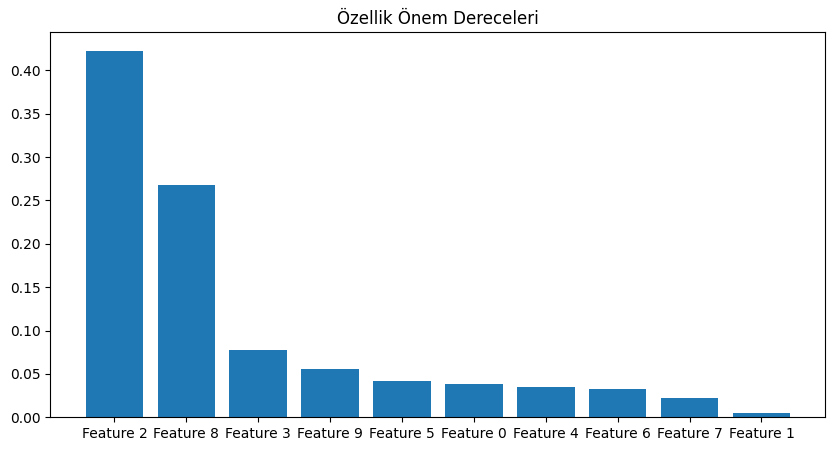

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Veri setini yükle
X, y = load_diabetes(return_X_y=True)

# Eğitim/test ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluştur
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)


importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Özellik Önem Dereceleri")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [f"Feature {i}" for i in indices])
plt.show()

Kritik Hiperparametreler:
* n_estimators --> Ağaç Sayısı --> 100-500 (ne kadar çoksa o kadar iyi, ancak hesaplama maliyeti artar)
* max_depth --> Ağaçların maksimum derinliği --> 3-10 (overfitting'i önlemek için)
* max_features --> Her düğümde kullanılacak maksimum özellik sayısı --> "sqrt" (özellik sayının karekökü) veya "log2"
* min_samples_split --> Bir düğümün bölünebilmesi için gereken minimum örnek sayısı --> 2-10 (küçük değerler overfitting'e yol açma ihtimali var)
* min_samples_leaf --> Bir yaprak düğümdeki minimum örnek sayısı --> 1-5

| Model            | Artıları                              | Eksileri                                 |
|------------------|----------------------------------------|-------------------------------------------|
| Random Forest    | Yüksek doğruluk, outlier direnci.     | Yavaş çalışabilir (büyük veride).        |
| Karar Ağacı      | Hızlı, yorumlanabilir.                | Aşırı öğrenme eğilimli.                  |
| Linear Regression| Hızlı, yorumlanabilir.                | Doğrusal olmayan ilişkilerde başarısız.  |
| SVR              | Doğrusal olmayan veride iyi.          | Hiperparametre ayarı zor.                |


# Model Değerlendirme Metrikleri

## 1. Ortalama Mutlak Hata - Mean Absolute Error (MAE) 

MAE (Ortalama Mutlak Hata), bir regresyon modelinin tahminlerindek **ortalama hata büyüklüğünü** ölçen bir metriktir. Gerçek değerler ile tahminler arasındaki **mutlak farkların ortalamasını** alır. Basit ve yorumlanabilir olmasıyla sıkça kullanılır.

Denklem:

$$
MAE = \frac {1}{n} \sum_{i=1}^n |y_i - \hat y_i|
$$

* $y_i$ : Gerçek değeler,
* $\hat y_i$ : Tahmin edilen değerler,
* $n$ : Örnek sayısı (Veri sayısı),
* $|y_i - \hat y_i|$ : Tahmin hatasının mutlak değeri

Mesela elimizde 4 gözlem olduğunu var sayalım:

| Gerçek Değer (y) | Tahmin (ŷ) | Hata | Mutlak Hata |
| ---------------- | ---------- | ---- | ----------- |
| 10               | 12         | +2   | 2           |
| 8                | 6          | -2   | 2           |
| 15               | 14         | -1   | 1           |
| 5                | 7          | +2   | 2           |

<br></br>

$$
MAE = \frac {2 + 2 + 1 +2}{4} = \frac{7}{4} = 1.75
$$

Avantajları:
* Yorumlaması kolay:
  * Hatanın ortalama büyüklüğünü gösterir.
* Aykırı Değelere Dirençli. (Outlier)
  * Mutlak değer kullandığı için, aşırı değerlerden **RMSE**'ye göre daha az etkilenir.
* Simetrik:
  * Pozitif ve negatif hataları eşit şekilde cezalandırır.

**Dikkat Edilmesi Gerekenler:**
* Hataların yönünü (pozitif/negatif) göstermez. (mutlak değer kullanır.)
  * Çözüm olarak **Mean Bias Error** **(MBE)** eklenebilir.
* Optimizasyon Zorluğu:
  * MAE'nin türevi (Gradyan) süreksiz olduğu için, bazı optimizasyon algoritmalarında (örn: Gradient Descent) **RMSE** daha sık kullanılır.
* Ölçek Bağımlılığı:
  * Farklı ölçekteki verilerin MAE'leri karşılaştırılmaz. Yani:
    * 1.000.000 TL konut fiyatının MAE değeri 50.000 diyelim.
    * Sınav puanı 0-100 arasında MAE değeri 5.
    * Bu iki MAE değerini kıyaslama imkanım yok. Her ikisininde hata payı %5 ama farklı ölçeklerden olaya bakıyorum.
    * Çözüm olarak (MAE / Veri aralığı) olabilir.
* Sıfıra ne kadar yakınsa, model o kadar iyi tahmin yapıyor demektir.

| Karşılaştırma    | MAE        | RMSE | 
| ---------------- | ---------- | ---- |
| Hesaplama             | Mutlak farkların ortalaması         | Hataların karelerinin ort. karekökü   | 
| Outlier Duyarlılığı                | Daha az duyarlı          | Aşırı değerleri daha sert cezalandırır   |
| Yorum               | Ortalama mutlak hata         | Hataların büyülğüne daha fazla ağırlık verir   | 

<br></br>

Hangi metrik kullanılmalı?
* Outlier'lar (aykırı değerler) önemliyse --> RMSE
* Tüm hatalar eşit ağırlıklı ise --> MAE

In [10]:
# Numpy ile hesaplama

import numpy as np

y_true = np.array([10, 15, 20])
y_pred = np.array([12, 14, 18])

MAE = np.mean(np.abs(y_true - y_pred))
print(f"MAE: {MAE:.2f}")

MAE: 1.67


In [11]:
# Scikit-learn kullanarak hesaplama yapalım.

from sklearn.metrics import mean_absolute_error

y_true = np.array([10, 15, 20])
y_pred = np.array([12, 14, 18])

MAE = mean_absolute_error(y_true, y_pred)
print(f"MAE: {MAE:.2f}")

MAE: 1.67


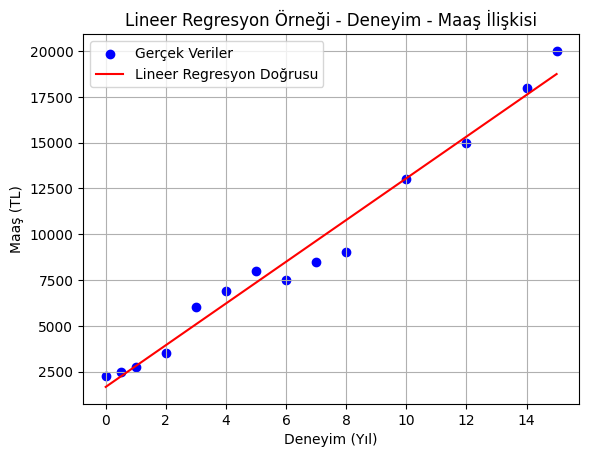

Sabit (a): 1663.8951974741067
Eğim (Slpoe) (b): [1138.34819698]
MAE (Ortalama Mutlak Hata): 680.18


In [ ]:
# Deneyim Maaş örneği MAE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Verilerimiz
X = np.array([[0.5], [0], [1], [5], [8], [4], [15], [7], [3], [2], [12], [10], [14], [6]]) # Deneyim
y = np.array([2500, 2250, 2750, 8000, 9000, 6900, 20000, 8500, 6000, 3500, 15000, 13000, 18000, 7500]) # Maaş

# Model oluşturma
model_LinearReg = LinearRegression()
model_LinearReg.fit(X, y)

# Tahmin (regresyon doğrusu)
X_line = np.arange(start=0, stop=16).reshape(-1,1)
y_pred = model_LinearReg.predict(X_line)

# Görselleştirme
plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.plot(X_line, y_pred, color="red", label="Lineer Regresyon Doğrusu")
plt.xlabel("Deneyim (Yıl)") 
plt.ylabel("Maaş (TL)")
plt.title("Lineer Regresyon Örneği - Deneyim - Maaş İlişkisi")
plt.legend()
plt.grid(True)
plt.show()

print("Sabit (a):", model_LinearReg.intercept_)
print("Eğim (Slpoe) (b):", model_LinearReg.coef_)

# Mae değeri
y_pred_train = model_LinearReg.predict(X)
mae = mean_absolute_error(y, y_pred_train)
# y --> gerçek maaşlar
# y_pred_train --> Modelin tahmin ettiği maaaşlar (Girdi olarak eğitim veri X kullandık)
print(f"MAE (Ortalama Mutlak Hata): {mae:.2f}")

## 2. Ortalama Kare Hata - Mean Squared Error (MSE)

**MSE (Ortalama Kare Hata)**, bir regresyon modelinin tahminlerinin gerçek değerlerden ne kadar saptığını ölçen istatistiksel bir metriktir. Hataların **karelerinin ortalamasını** alır ve büyük hataları daha sert cezalandırır.

Denklem:

$$
MSE = \frac{1}{n} \sum_ {i=1}{n} (y_i- \hat y_i)^2
$$

* $y_i$ : Gerçek değerler,
* $\hat y_i$ : Tahmin edilen değerler,
* $n$ : Örnek sayısı.

| Gerçek $y_i$                     | Tahmin $\hat y_i$               | Kare Hata $(y_i - \hat y_i)^2$                                    |
| --------------------------- | ----------------- | -------------------------------------- |
| 10                   | 12       | $(10-12)^2 = 4$                          |
| 15          | 14                             | $(15-14)^2 = 1$ |
| 20          | 18 | $(20-18)^2 = 4$                    |

<br></br>
$$
MSE = \frac{4 +1+4}{3} = 3
$$

Yorum: Modelin tahminleri, gerçek değerlerden ortalama **3 brim $^2$** kadar uzaklaştığını söyler.

Özellikleri:
* Büyük Hataları Cezalandırır:
  * Kare alma işlemi, büyük hataları (outlier'ları) küçük hatalara göre **daha ağır şekilde** cezalandırır.
* Birimi: Orijinal verinin biriminin karesidir. TL $^2$, m $^2$, bu yüzden **RMSE (karekök MSE)** sıkça kullanılır.
* Optimizayon için Uygundur: 
  * Türevi alınabilir olduğu için gradient descent gibi algoritmalarda kullanılır.

Avantajları:
* Özellikle büyük hatalara karşı duyarlı olduğu için bazı durumlarda daha uygun.
* Matematiksel olarak türevlenebilir olduğu için **optimizasyon işlemlerinde tercih edilir** (gradient descent).

Dezavantajları:
* Yorumlaması zor olabilir, birimi "karesel"
* Aykırı değerlere karşı hassas olabilir.

| Özellik                     | MAE               | MSE                                    |
| --------------------------- | ----------------- | -------------------------------------- |
| Hata türü                   | Mutlak fark       | Karesel fark                           |
| Aykırı değerlere duyarlılık | Daha az           | Daha fazla                             |
| Yorumu kolay mı?            | Evet (aynı birim) | Hayır (kare birim)                     |
| Cezalandırma                | Lineer            | Karesel (büyük hataya daha fazla ceza) |


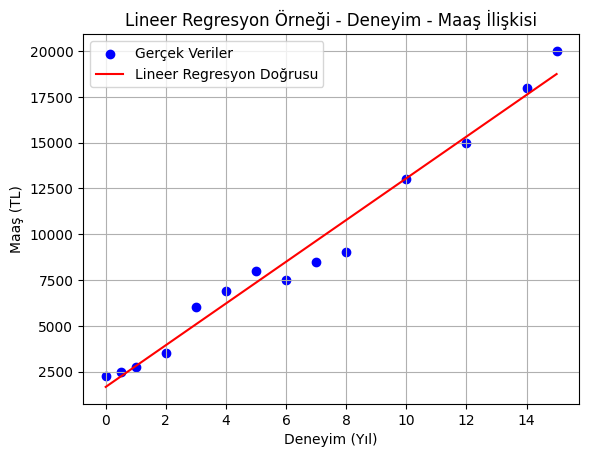

Sabit (a): 1663.8951974741067
Eğim (Slpoe) (b): [1138.34819698]
MSE (Ortalama Kare Hata): 685945.85


In [ ]:
# Deneyim Maaş örneği MSE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Verilerimiz
X = np.array([[0.5], [0], [1], [5], [8], [4], [15], [7], [3], [2], [12], [10], [14], [6]]) # Deneyim
y = np.array([2500, 2250, 2750, 8000, 9000, 6900, 20000, 8500, 6000, 3500, 15000, 13000, 18000, 7500]) # Maaş

# Model oluşturma
model_LinearReg = LinearRegression()
model_LinearReg.fit(X, y)

# Tahmin (regresyon doğrusu)
X_line = np.arange(start=0, stop=16).reshape(-1,1)
y_pred = model_LinearReg.predict(X_line)

# Görselleştirme
plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.plot(X_line, y_pred, color="red", label="Lineer Regresyon Doğrusu")
plt.xlabel("Deneyim (Yıl)") 
plt.ylabel("Maaş (TL)")
plt.title("Lineer Regresyon Örneği - Deneyim - Maaş İlişkisi")
plt.legend()
plt.grid(True)
plt.show()

print("Sabit (a):", model_LinearReg.intercept_)
print("Eğim (Slpoe) (b):", model_LinearReg.coef_)

# MSE hesaplama
y_pred_train = model_LinearReg.predict(X)
mse = mean_squared_error(y, y_pred_train)
# y --> gerçek maaşlar
# y_pred_train --> Modelin tahmin ettiği maaaşlar (Girdi olarak eğitim veri X kullandık)
print(f"MSE (Ortalama Kare Hata): {mse:.2f}")

* Yorumlamak zor olduğu için RMSE değerine bakalım.

## 3. Kök Ortalama Kare Hate - Root Mean Squared Error (RMSE)

**RMSE (Kök Ortalama Kare Hata)**, regresyon modellerinin tahmin performansını ölçmek için kullanılan bir metriktir. MSE'nin (Mean Squared Error) karekökü alınarak hesaplanır ve hatayı orijinal veri birimleriyle ifade eder. Büyük hataları daha belirgin şekilde cezalandırır.

Denklem:

$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat y_i)^2 }
$$

* $y_i$ : Gerçek değerler,
* $\hat y_i$ : Tahmin edilen değerler,
* $n$ : Örnek sayısı.

$$
RMSE = \sqrt 3 \approx 1.73
$$

Yorum: RMSE değerimiz 1.73 çıktı diyelim. Modelin tahminleri, gerçek değerlerden ortalama **1.73** birim sapıyor diyebiliriz.

Avantajları:
* Yorumlaması kolaydır.
  * Sonuç tahmin edilen değişkenle aynı birimdedir. (TL, kg, vb..)
* Büyük hatalara daha fazla ceza verir. 
  * Hataların karesi alındığı için, büyük hatalar daha fazla etki eder.
* MSE'den daha anlaşılır.
  * Kare alma işlemi geri alındığı için birim doğrudan kullanılabilir.

Dezavantajları:
* Aykırı değerlere (outlier) **duyarlıdır,** çünkü kare alma işlemi büyük hataları büyütür.
* MAE'ye göre daha fazla etkilenir.

<br></br>
Dikkat Edilmesi Gerekenler:
* Outlier Duyarlılığı:
  * RMSE, birkaç büyük hatanın metriği önemli ölçüde arttırmasına neden olabilir. Outlier'lar varsa MAE daha iyi bir seçim olabilir.
* Karşılaştırma İçin Aynı Ölçek:
  * Farklı veri setlerinin RMSE'lerini karşılaştırırken, veri ölçeklerinin aynı olduğundan emin olmamız gerekir.
* Sıfıra Yakınlık:
  * **Mükemmel bir modelde RMSE = 0 olur. Değer ne kadar küçükse, model o kadar iyidir.**

<br></br>
Hangi Metrik Kullanılmalı?

* Outlier önemliyse ver birim önemliyse --> RMSE
* Tüm hatalar eşit ağırlıkta ise --> MAE
* Model optimizasyonu yapılıyorsa --> MSE

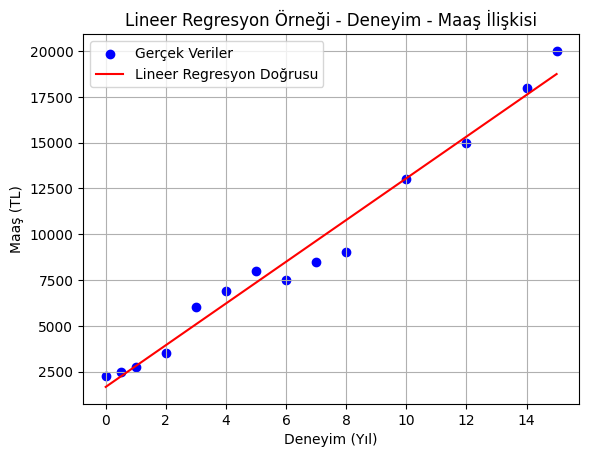

Sabit (a): 1663.8951974741067
Eğim (Slpoe) (b): [1138.34819698]
RMSE (Ortalama Kare Hata): 828.22
RMSE (Ortalama Kare Hata): 828.22


e:\Program Files (x86)\Python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
# Deneyim Maaş örneği RMSE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Verilerimiz
X = np.array([[0.5], [0], [1], [5], [8], [4], [15], [7], [3], [2], [12], [10], [14], [6]]) # Deneyim
y = np.array([2500, 2250, 2750, 8000, 9000, 6900, 20000, 8500, 6000, 3500, 15000, 13000, 18000, 7500]) # Maaş

# Model oluşturma
model_LinearReg = LinearRegression()
model_LinearReg.fit(X, y)

# Tahmin (regresyon doğrusu)
X_line = np.arange(start=0, stop=16).reshape(-1,1)
y_pred = model_LinearReg.predict(X_line)

# Görselleştirme
plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.plot(X_line, y_pred, color="red", label="Lineer Regresyon Doğrusu")
plt.xlabel("Deneyim (Yıl)") 
plt.ylabel("Maaş (TL)")
plt.title("Lineer Regresyon Örneği - Deneyim - Maaş İlişkisi")
plt.legend()
plt.grid(True)
plt.show()

print("Sabit (a):", model_LinearReg.intercept_)
print("Eğim (Slpoe) (b):", model_LinearReg.coef_)

# MSE hesaplama
y_pred_train = model_LinearReg.predict(X)
mse = mean_squared_error(y, y_pred_train, squared=False)
mse_ = root_mean_squared_error(y, y_pred_train)
# y --> gerçek maaşlar
# y_pred_train --> Modelin tahmin ettiği maaaşlar (Girdi olarak eğitim veri X kullandık)
print(f"RMSE (Ortalama Kare Hata): {mse:.2f}")
print(f"RMSE (Ortalama Kare Hata): {mse_:.2f}")

## 4. R-Kare - R-Squared ($R^2$)

$R^2$ **(R-Kare)**, bir regresyon modelinin **bağımlı değişkenin (hedef) varyansını ne kadar iyi açıkladığını** ölçen bir metriktir. **0 ile 1** arasında değer alır ve yüzde olarak yorumlanabilir.

* **1'e Yakın (Örn: 0.9):** Model, verideki varyansın %90'ını açıklıyor (mükemmele yakın).
* **0'a Yakın (Örn: 0.2):** Model, y'nin varyansını zayıf açıklıyor.
* **Negatif Değerler:** Model, basit bir ortalamadan daha kötü performans gösteriyor.


$R^2 = 0.85$ ise, model hedef değişkendeki varyansın %85'ini açıklıyor ama kalan %15 ise model tarafından açıklanamayan hatalar veya rastgeleliktir.

<br></br>
Denklem:

$$
R^2 = 1 - \frac {SS_{res}} {SS_{tot}}
$$

* $SS_{res} = \sum_{i=1}^{n} (y_i - \hat y_i)^2$ --> Modelin tahmin hatalarının karelerinin toplamı (residual sum of squares) 
* $SS_{tot} = \sum_{i=1}^{n} (y_i - \hat y_i)^2$ --> Gerçek değerlerin ortalamaya göre kare farklarının toplamı (total sum of squares)

Önemli.
* Özellik Sayısına Duyarlılık:
  * Modele gereksiz özellikler eklendikçe $R^2$ yapay olarak artar. Bu sorunu çözmek için **Adjusted $R^2$** kullanılır.

Adjusted $R^2$ Denklemi:

$$
1 - \frac {(1-R^2)(n-1)} {n-p-1}
$$

* $n$ : Örnek Sayısı,
* $p$ : Özellik Sayısı.
<br></br>
* $R^2$ --> Basit ve anlaşılırken (avantaj), Özellik sayısı arttıkça şişer (dezavantaj).
* Adjusted $R^2$ --> Gereksiz özellikleri cezalandırırken (avantaj), Yorumu $R^2$ kadar sezgisel değil (dezavantaj).

<br></br>
Dikkat Edilmesi Gerekenler:

* Yüksek $R^2$ Her Zaman İyi Değildir:
* Overfitting olmuş bir modelde $R^2$ yüksek çıkabilir, ancak yeni verilerde kötü performans gösterir.
* Lineer İlişki Varsayımı:
  * $R^2$, lineer modeller için tasarlanmıştır. Doğrusal olmayan modellerde yanıltıcı olabilir.
* Sabit Terim (Intercept) Önemli:
  * Modelde sabit terim ($b_0$ ya da $a$) yoksa $R^2$ negatif çıkabilir.

Proje: Bir sağlık veri setinde, hastaların kan basıncını tahmin eden model:

* $R^2$ = 0.72
* Anlamı: Model, kan basıncı varyansının %72'sini açıklıyor.
* Karar:
  * $R^2$ > 0.6 kabul edilebilir sayılıyorsa → Model kullanıma alınır.

$R^2$ ile Model Karşılaştırma
Aynı veri üzerinde iki model:
* Model A: $R^2$ = 0.85
* Model B: $R^2$ = 0.78

Sonuç: Model A daha iyidir (daha yüksek $R^2$).

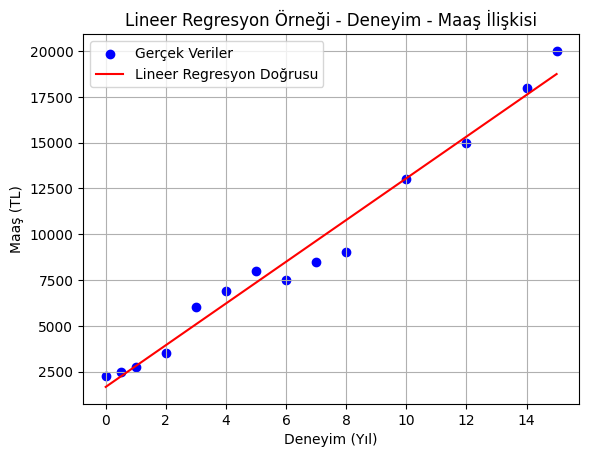

Sabit (a): 1663.8951974741067
Eğim (Slpoe) (b): [1138.34819698]
R^2 (R^2): 0.98


In [21]:
# Deneyim Maaş örneği R^2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Verilerimiz
X = np.array([[0.5], [0], [1], [5], [8], [4], [15], [7], [3], [2], [12], [10], [14], [6]]) # Deneyim
y = np.array([2500, 2250, 2750, 8000, 9000, 6900, 20000, 8500, 6000, 3500, 15000, 13000, 18000, 7500]) # Maaş

# Model oluşturma
model_LinearReg = LinearRegression()
model_LinearReg.fit(X, y)

# Tahmin (regresyon doğrusu)
X_line = np.arange(start=0, stop=16).reshape(-1,1)
y_pred = model_LinearReg.predict(X_line)

# Görselleştirme
plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.plot(X_line, y_pred, color="red", label="Lineer Regresyon Doğrusu")
plt.xlabel("Deneyim (Yıl)") 
plt.ylabel("Maaş (TL)")
plt.title("Lineer Regresyon Örneği - Deneyim - Maaş İlişkisi")
plt.legend()
plt.grid(True)
plt.show()

print("Sabit (a):", model_LinearReg.intercept_)
print("Eğim (Slpoe) (b):", model_LinearReg.coef_)

# MSE hesaplama
y_pred_train = model_LinearReg.predict(X)
r2 = r2_score(y, y_pred_train)
# y --> gerçek maaşlar
# y_pred_train --> Modelin tahmin ettiği maaaşlar (Girdi olarak eğitim veri X kullandık)
print(f"R^2 (R^2): {r2:.2f}")


## 5. Ortalama Mutlak Yüzde Hata - Mean Absolute Percentage Error (MAPE)

**MAPE (Ortalama Mutlak Yüzde Hata),** bir regresyon modelinin tahmin hatalarını **yüzde (%)** cinsinden ölçen bir performans metriğidir. Gerçek değerlerin ne kadarının **hata olarak kaybedildiğini** gösterir ve özellikle **ölçeklenmiş hata analizi** için idealdir.

Denklem:

$$
MAPE = \frac {100\%}{n} \sum_{i=1}^{n} \left | \frac{y_i - \hat y_i}{y_i} \right |
$$

* $y_i$ : Gerçek değerler,
* $\hat y_i$ : Tahmin edilen değerler,
* $n$ : Örnek sayısı.

NOT:
* $y_i = 0$ ise MAPE tanımsızdır (sıfıra bölme hatası)
* Hatalar % olarak ifade edilir. MAPE = %5 --> Tahminler ortalama %5 hatalı

Özellikleri
* Yüzdesel Yorum Kolaylığı:
  * Hatalar % cinsinden olduğu için **iş birimleriyle kolay iletişim sağlar.**
  * Örn: Tahminlerde ortalama %5 hata var.
* Ölçek Bağımsızdır:
  * Verinin biriminden (TL, °C) bağımsızdır. Farklı ölçekteki modeller karşılaştırılabilir.
* Pozitif Değerler Gerektirir:
  * Gerçek değerler $(y_i)$ **sıfır veya negatif** olamaz (paydaya bak).
* Asimetrik Cezalandırma:
  * Aynı mutlak hatayı üreten **fazla tahmin** ve **eksik tahmin** farklı yüzdelere dönüşebilir.

MAPE Kullanım Senaryoları

1. Satış Tahmini:
   * Gerçek satış: 1000 adet, Tahmin 950 adet --> hata %5
2. Finansal Projeksiyonlar:
   * Gerçek kâr: 1M TL, Tahmin 1.1M TL --> Hata %10
3. Envanter Yönerimi:
   * Gerçek talep: 200 birim, Tahmin 180 birim --> Hata 10%

Dikkat Edilmesi Gerekenler

1. Sıfır/Negatif Veri Problemi:
   * $y_i =0$ ise **sMAPE (Symmetric MAPE)** veya **MAE** kullan.
2. Asimetrik Cezalandırma:
   * Fazla tahmin $(\hat y_i > y_i)$ ve eksik tahmin $(\hat y_i < y_i)$ farklı yüzdeler üretebilir.
3. Aşırı Düşük Gerçek Değerler:
   * $y_i$ çok küçükse, hata yüzdesi aşırı büyüyebilir.

**sMAPE (Symmetric MAPE) Denklemi**

$$
sMAPE = \frac{100\%}{n} \sum \frac {|y_i - \hat y_i|} {(|y_i| + |\hat y_i |) / 2}
$$

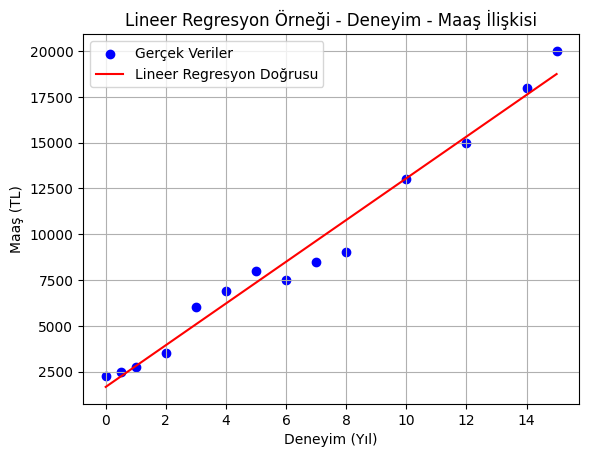

Sabit (a): 1663.8951974741067
Eğim (Slpoe) (b): [1138.34819698]
MAPE : 0.10
MAPE (%): 10.13


In [29]:
# Deneyim Maaş örneği MAPE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Verilerimiz
X = np.array([[0.5], [0], [1], [5], [8], [4], [15], [7], [3], [2], [12], [10], [14], [6]]) # Deneyim
y = np.array([2500, 2250, 2750, 8000, 9000, 6900, 20000, 8500, 6000, 3500, 15000, 13000, 18000, 7500]) # Maaş

# Model oluşturma
model_LinearReg = LinearRegression()
model_LinearReg.fit(X, y)

# Tahmin (regresyon doğrusu)
X_line = np.arange(start=0, stop=16).reshape(-1,1)
y_pred = model_LinearReg.predict(X_line)

# Görselleştirme
plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.plot(X_line, y_pred, color="red", label="Lineer Regresyon Doğrusu")
plt.xlabel("Deneyim (Yıl)") 
plt.ylabel("Maaş (TL)")
plt.title("Lineer Regresyon Örneği - Deneyim - Maaş İlişkisi")
plt.legend()
plt.grid(True)
plt.show()

print("Sabit (a):", model_LinearReg.intercept_)
print("Eğim (Slpoe) (b):", model_LinearReg.coef_)

# MAPE hesaplama
y_pred_train = model_LinearReg.predict(X)
mape = mean_absolute_percentage_error(y, y_pred_train)
# y --> gerçek maaşlar
# y_pred_train --> Modelin tahmin ettiği maaaşlar (Girdi olarak eğitim veri X kullandık)
print(f"MAPE : {mape:.2f}")
print(f"MAPE (%): {mape * 100:.2f}")


# Algoritma Seçim Kriterleri

En iyi parametreler: {'C': 10, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}


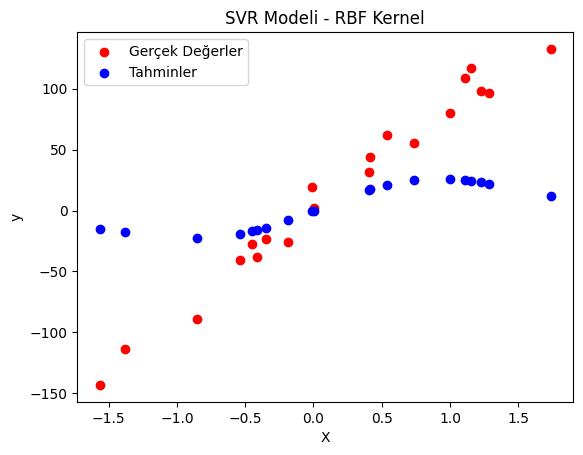

In [ ]:
# Temel SVR Modeli

from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Örnek veri oluştur
X, y = make_regression(n_samples=100, n_features=1, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVR modeli (RBF kernel)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Tahmin
y_pred = svr.predict(X_test)



# ----------------------------------------

# Hiperparametre Optimizasyonu (GridSearchCV)
from sklearn.model_selection import GridSearchCV

# Parametre ağı
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)

# ------------------------------------------

# import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='red', label='Gerçek Değerler')
plt.scatter(X_test, y_pred, color='blue', label='Tahminler')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR Modeli - RBF Kernel')
plt.legend()
plt.show()